# Exploratory Data Analysis for NBA player statistics using DraftKings Player Cost

The objective of this project is to learn the patterns of Draftkings pricing and find potential gaps in the player pricing.  This project will start by exploring a ratio of actual performance points, which are measured as DraftKingTotals, and DK Sal, which is the fake dollar amount that draftkings assigned a player before a game.  The column DraftKingTotals is caluclated with the rubric that can be found in Jupyter notebook titled DraftKings_Scoring_table.  The player costs were scraped from a CSV file that had every players' draftkings costs for each game last season.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings
import statsmodels.api as sm

In [2]:
MergedDF=pd.read_csv("MergedStatsAndSalaries.csv")

In [3]:
MergedDF.dtypes

Unnamed: 0               int64
PlayerFullName          object
PlayerName              object
Unnamed: 0_x             int64
Rk                       int64
G                        int64
Date                    object
Age                     object
Tm                      object
Unnamed: 5              object
Opp                     object
Unnamed: 7              object
GS                     float64
MP                     float64
FG                     float64
FGA                    float64
FG%                    float64
3P                     float64
3PA                    float64
3P%                    float64
FT                     float64
FTA                    float64
FT%                    float64
ORB                    float64
DRB                    float64
TRB                    float64
AST                    float64
STL                    float64
BLK                    float64
TOV                    float64
PF                     float64
PTS                    float64
GmSc    

In [4]:
MergedDF.head()

,Unnamed: 0,PlayerFullName,PlayerName,Unnamed: 0_x,Rk,G,Date,Age,Tm,Unnamed: 5,...,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0_y,DK Sal,Minutes,First Last
0,0,PreciousAchiuwa,Precious Achiuwa,0,1,1,2020-12-23,21-095,MIA,@,...,0,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa
1,1,PreciousAchiuwa,Precious Achiuwa,0,1,1,2020-12-23,21-095,MIA,@,...,0,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa
2,2,PreciousAchiuwa,Precious Achiuwa,1,2,2,2020-12-25,21-097,MIA,NaN,...,0,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa
3,3,PreciousAchiuwa,Precious Achiuwa,1,2,2,2020-12-25,21-097,MIA,NaN,...,0,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa
4,4,PreciousAchiuwa,Precious Achiuwa,2,3,3,2020-12-29,21-101,MIA,NaN,...,0,False,False,0.0,0,16.00,37681,3100,17.633333,Precious Achiuwa


In [5]:
MergedDF["PointCostRatio"]=(MergedDF["DraftKingTotals"]/MergedDF["DK Sal"])*10000

To clarify, the higher the ratio, the better the performance.  If this ratio is particularly high, then that would mean a performace was underestimated or unver valued.  I mulitplied the ratio for all lines be 1000 just for convenience of not working with small decimal values.

In [6]:
MergedDF=MergedDF.drop_duplicates(subset=['PlayerFullName', 'Date'], keep='last')
MergedDF

,Unnamed: 0,PlayerFullName,PlayerName,Unnamed: 0_x,Rk,G,Date,Age,Tm,Unnamed: 5,...,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0_y,DK Sal,Minutes,First Last,PointCostRatio
1,1,PreciousAchiuwa,Precious Achiuwa,0,1,1,2020-12-23,21-095,MIA,@,...,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa,39.166667
3,3,PreciousAchiuwa,Precious Achiuwa,1,2,2,2020-12-25,21-097,MIA,NaN,...,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa,64.166667
5,5,PreciousAchiuwa,Precious Achiuwa,2,3,3,2020-12-29,21-101,MIA,NaN,...,False,False,0.0,0,16.00,37681,3100,17.633333,Precious Achiuwa,51.612903
7,7,PreciousAchiuwa,Precious Achiuwa,3,4,4,2020-12-30,21-102,MIA,NaN,...,False,False,0.0,0,6.75,37680,3000,12.016667,Precious Achiuwa,22.500000
9,9,PreciousAchiuwa,Precious Achiuwa,4,5,5,2021-01-01,21-104,MIA,@,...,False,False,0.0,0,18.50,37679,3200,11.983333,Precious Achiuwa,57.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21940,21942,DanteExum,Dante Exum,2,3,2,2020-12-27,25-167,CLE,NaN,...,False,False,0.0,0,23.50,35519,3000,23.083333,Dante Exum,78.333333
21941,21943,DanteExum,Dante Exum,3,4,3,2020-12-29,25-169,CLE,NaN,...,False,False,0.0,0,7.75,35518,3300,16.216667,Dante Exum,23.484848
21942,21944,DanteExum,Dante Exum,4,5,4,2020-12-31,25-171,CLE,@,...,False,False,0.0,0,14.00,35517,3400,28.266667,Dante Exum,41.176471
21943,21945,DanteExum,Dante Exum,5,6,5,2021-01-02,25-173,CLE,@,...,False,False,0.0,0,14.75,35516,3600,34.616667,Dante Exum,40.972222


# Overcoming Overplotting

A major challenge of creating effective data visualization for this project is the fact that this dataframe is massive.  The effort here is to create a visualization that is not overwheling and clearly portrays the data.

In [7]:
MergedDF.corr()

,Unnamed: 0,Unnamed: 0_x,Rk,G,GS,MP,FG,FGA,FG%,3P,...,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0_y,DK Sal,Minutes,PointCostRatio
Unnamed: 0,1.000000,0.008071,0.008126,-0.047576,-0.121897,NaN,-0.113722,-0.117301,-0.033512,-0.082843,...,-0.007865,-0.027487,0.013073,-0.027487,0.013073,-0.122743,-0.001104,-0.137110,-0.139171,-0.073009
Unnamed: 0_x,0.008071,1.000000,0.999915,0.857052,0.025121,NaN,0.025244,0.021705,0.009753,0.005647,...,-0.006888,0.002566,-0.000510,0.002566,-0.000510,0.021799,-0.020995,0.001391,0.022800,0.043497
Rk,0.008126,0.999915,1.000000,0.857188,0.025059,NaN,0.025177,0.021610,0.009769,0.005682,...,-0.006800,0.002479,-0.000509,0.002479,-0.000509,0.021721,-0.020827,0.001407,0.022725,0.043391
G,-0.047576,0.857052,0.857188,1.000000,0.172662,NaN,0.156302,0.160990,0.041391,0.090383,...,-0.005548,0.053476,0.020705,0.053476,0.020705,0.167431,-0.006336,0.165461,0.212625,0.128120
GS,-0.121897,0.025121,0.025059,0.172662,1.000000,NaN,0.495006,0.549826,0.065736,0.273564,...,0.007041,0.248947,0.080662,0.248947,0.080662,0.562624,-0.015780,0.639852,0.675972,0.281557
MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FG,-0.113722,0.025244,0.025177,0.156302,0.495006,NaN,1.000000,0.886278,0.423990,0.570837,...,0.002226,0.339972,0.104070,0.339972,0.104070,0.880643,-0.014190,0.670783,0.705343,0.659411
FGA,-0.117301,0.021705,0.021610,0.160990,0.549826,NaN,0.886278,1.000000,0.074532,0.546673,...,0.002929,0.313132,0.109762,0.313132,0.109762,0.843169,-0.003550,0.735347,0.778325,0.569796
FG%,-0.033512,0.009753,0.009769,0.041391,0.065736,NaN,0.423990,0.074532,1.000000,0.191179,...,-0.000025,0.113584,0.019503,0.113584,0.019503,0.303242,-0.027023,0.081648,0.122250,0.390765
3P,-0.082843,0.005647,0.005682,0.090383,0.273564,NaN,0.570837,0.546673,0.191179,1.000000,...,-0.005454,0.028640,0.010772,0.028640,0.010772,0.521586,0.021851,0.309513,0.458536,0.476731


In [8]:
#sns.pairplot(MergedDF)

<AxesSubplot:>

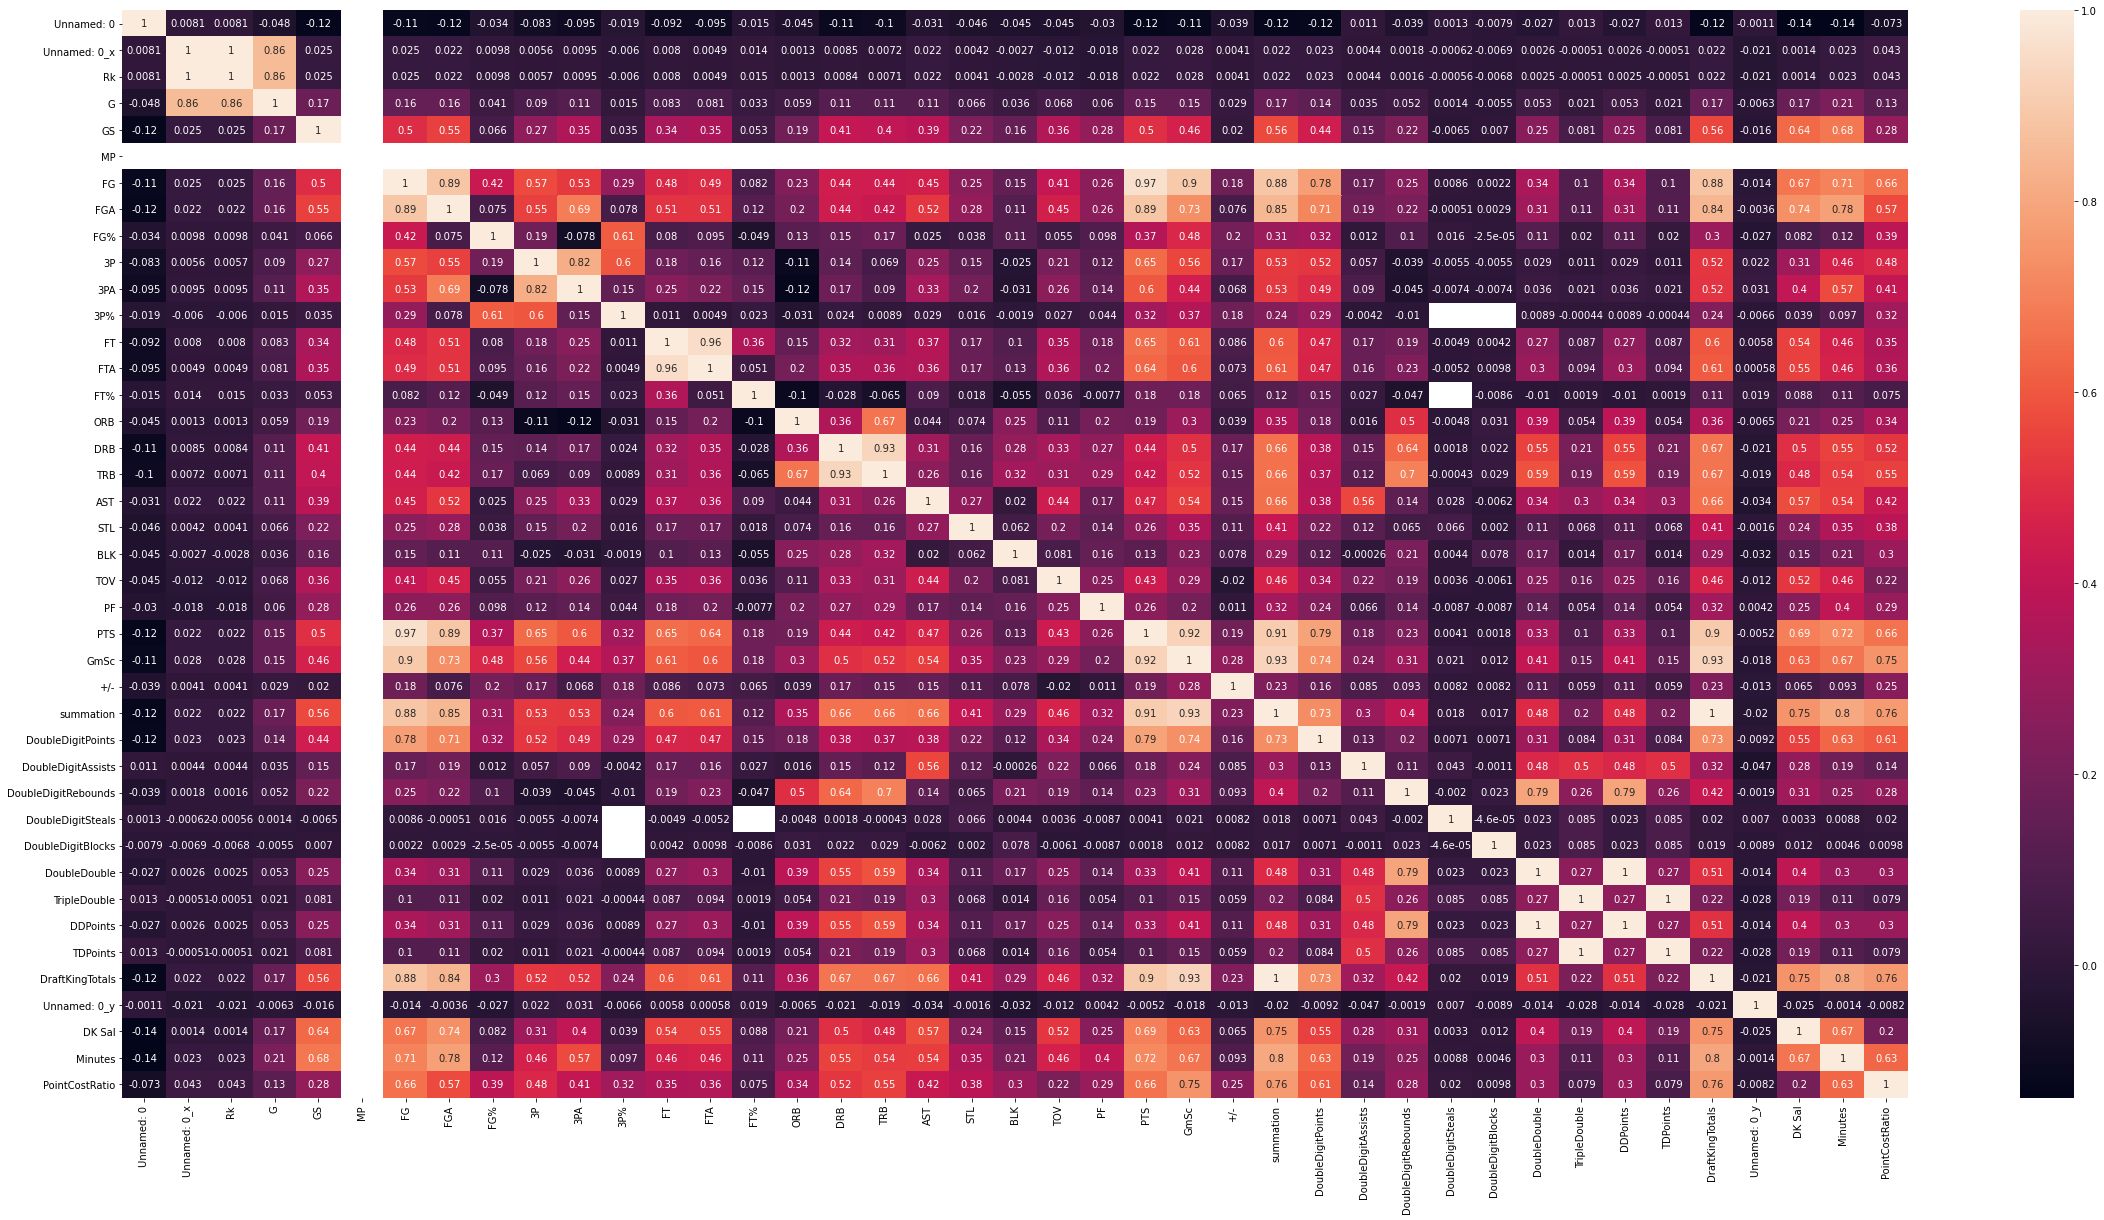

In [9]:
plt.figure(figsize=(40,20))
sns.heatmap(MergedDF.corr(), annot=True)

A lot can be learned from looking at this heat map.  We can see which stats are most correlated to a strong point to cost ratio.  Additionally, we can see what statistics carry more weight and are more dependable.  For example, there is a stronger correlation of total rebounds (TRB) to PointCostRatio than for assists (AST) to PointCostRatio.  This could tell us that, in terms of pricing, it may be better to favor players who get a lot of rebounds over players who get a lot of assists.  It is clear that of the basic statistics, PTS have the greatest correlation to PointCostRatio.  

<AxesSubplot:xlabel='PTS', ylabel='PointCostRatio'>

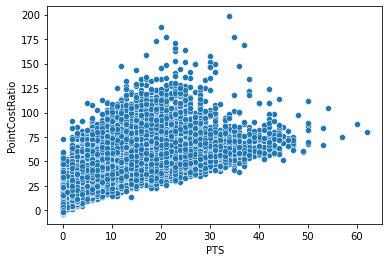

In [10]:
sns.scatterplot(x="PTS", y="PointCostRatio", data=MergedDF)

# Modeling Linear Regression

In [11]:
X = MergedDF[['PTS']]
y = MergedDF[["PointCostRatio"]]
# Train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16338, 1) (16338, 1)
(5446, 1) (5446, 1)


In [13]:
rModel = linear_model.LinearRegression(normalize=True)

In [14]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [15]:
print(rModel.score(X_train, y_train))

0.4417143344254417


Right now, our model explains only about 43.7% of the variation from the mean

In [16]:
y_pred = rModel.predict(X_test)

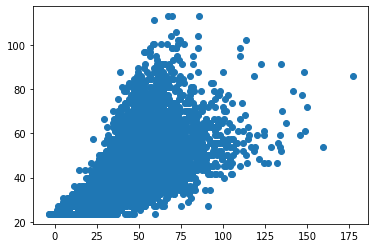

In [17]:
plt.scatter(y_test,y_pred)

# Modeling Ordinary Least Squares Method (OLS)

In [18]:
X = MergedDF[['PTS']]

X = sm.add_constant(X)

In [19]:
y = MergedDF[['PointCostRatio']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [20]:
rModel2 = sm.OLS(y_train, X_train)
rModel2_results = rModel2.fit()

In [21]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PointCostRatio   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:45:27   Log-Likelihood:                -69749.
No. Observations:               16338   AIC:                         1.395e+05
Df Residuals:                   16336   BIC:                         1.395e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5881      0.216    109.338      0.000      23.165      24.011
PTS            1.7870      0.016    113.688      0.000       1.756       1.818
==============================================================================
Omnibus:                     2500.876   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4917.279
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                       4.906   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'PointCostRatio')

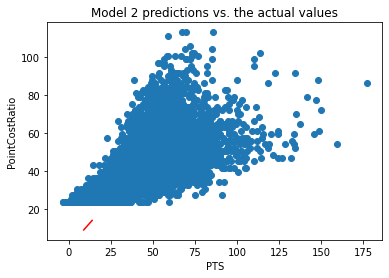

In [23]:
plt.scatter(y_test, y_pred)

plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("PTS")
plt.ylabel("PointCostRatio")

In [24]:
MergedDF["PointCostRatio"].mean()

42.715402999680336

The average ratio for all players of all games last year was 42.69950988301117

The next step will be group all the PointCostRatios for each player and analyze which players are particularly over valued and under valued.

In [25]:
PlayerAverage= MergedDF.groupby(['PlayerName', 'PointCostRatio'], as_index=False, sort=True).mean().groupby('PlayerName')['PointCostRatio'].mean()

In [26]:
PlayerAverage

PlayerName
Aaron Gordon           41.907940
Aaron Holiday          42.642275
Aaron Nesmith          33.989202
Abdel Nader            41.212948
Al Horford             52.348481
                         ...    
Xavier Tillman Sr.     43.199550
Yuta Watanabe          38.203575
Zach LaVine            49.610438
Zeke Nnaji             27.141388
Zion Williamson        50.507896
Name: PointCostRatio, Length: 473, dtype: float64

In [27]:
PlayerAverage.dtypes

dtype('float64')

In [28]:
SortedAverage=PlayerAverage.sort_values(ascending=False)

In [29]:
SortedAverage=SortedAverage.to_frame()

In [30]:
SortedAverage

,PointCostRatio
PlayerName,
Russell Westbrook,56.608037
Ty Jerome,55.252937
Nikola Jokić,53.883490
Kevin Porter Jr.,53.553873
Kelly Olynyk,53.444172
...,...
Tyrell Terry,10.959433
Tyler Bey,10.547327
Nick Richards,9.237231


In [31]:
SortedAverage.to_csv("SortedPointCostRatio.csv")

We now have a good sense of what players can be considered over performers to their pricing and we have a better sense of what average ratios are really good vs really bad.  I think it will be important to analyze standard deviation data also because there could be advantages for identifying players with large ratios and small standard devitaions.  That would mean over performance on a consistent basis.  For future modeling, we may care about standard deviation values more than average values but more to come on that.

In [32]:
PlayerDeviation= MergedDF.groupby(['PlayerName', 'PointCostRatio'], as_index=False, sort=True).mean().groupby('PlayerName')['PointCostRatio'].std()

In [33]:
SortedDeviations=PlayerDeviation.sort_values(ascending=True)

In [34]:
SortedDeviations.mean()

21.348855986186916

The average standard deviation for all players is 21.35

In [35]:
SortedDeviations.to_csv("SortedDeviations.csv")

In [36]:
type(SortedDeviations)

pandas.core.series.Series

In [37]:
SortedDeviations = SortedDeviations.to_frame()


In [38]:
SortedDeviations

,PointCostRatio
PlayerName,
Jared Harper,3.039097
Spencer Dinwiddie,3.625365
Nick Richards,6.649471
Keljin Blevins,7.236049
Tyler Bey,7.921265
...,...
Oshae Brissett,39.747383
Jay Scrubb,48.168396
Jordan Nwora,49.927553


In [39]:
MergeRatios = pd.merge(SortedAverage, SortedDeviations, how="inner", on=["PlayerName"])

In [40]:
MergeRatios['Average']=MergeRatios['PointCostRatio_x']
MergeRatios['StandardDeviation']=MergeRatios['PointCostRatio_y']

In [41]:
MergeRatios

,PointCostRatio_x,PointCostRatio_y,Average,StandardDeviation
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,56.608037,12.606392
Ty Jerome,55.252937,21.725725,55.252937,21.725725
Nikola Jokić,53.883490,11.789333,53.883490,11.789333
Kevin Porter Jr.,53.553873,33.742134,53.553873,33.742134
Kelly Olynyk,53.444172,21.305469,53.444172,21.305469
...,...,...,...,...
Tyrell Terry,10.959433,12.558782,10.959433,12.558782
Tyler Bey,10.547327,7.921265,10.547327,7.921265
Nick Richards,9.237231,6.649471,9.237231,6.649471


In [46]:
MergeRatios.to_csv("oct2021.csv")

Text(0.5, 0, 'Average Ratio')

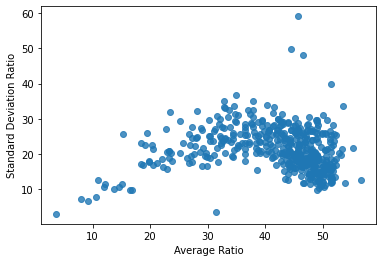

In [42]:
plt.scatter(x="Average", y="StandardDeviation", data=MergeRatios, alpha=0.8)
plt.ylabel("Standard Deviation Ratio")
plt.xlabel("Average Ratio")

In [43]:
first_50 = MergeRatios.head(50)

In [44]:
first_50

,PointCostRatio_x,PointCostRatio_y,Average,StandardDeviation
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,56.608037,12.606392
Ty Jerome,55.252937,21.725725,55.252937,21.725725
Nikola Jokić,53.883490,11.789333,53.883490,11.789333
Kevin Porter Jr.,53.553873,33.742134,53.553873,33.742134
Kelly Olynyk,53.444172,21.305469,53.444172,21.305469
Mason Plumlee,53.200547,19.662144,53.200547,19.662144
T.J. McConnell,52.878969,20.381473,52.878969,20.381473
Al Horford,52.348481,18.573917,52.348481,18.573917
Trevor Ariza,52.326608,25.546529,52.326608,25.546529


In [45]:
first_50.dtypes

PointCostRatio_x     float64
PointCostRatio_y     float64
Average              float64
StandardDeviation    float64
dtype: object

In [46]:
del first_50['PointCostRatio_x']
del first_50['PointCostRatio_y']

In [47]:
first_50.index.values

array(['Russell Westbrook ', 'Ty Jerome ', 'Nikola Jokić ',
       'Kevin Porter Jr. ', 'Kelly Olynyk ', 'Mason Plumlee ',
       'T.J. McConnell ', 'Al Horford ', 'Trevor Ariza ',
       'Thaddeus Young ', 'Domantas Sabonis ', 'Nicolas Claxton ',
       'Darius Garland ', 'Cody Zeller ', 'Cameron Payne ',
       'James Harden ', 'Jonas Valančiūnas ', 'Dewayne Dedmon ',
       'Julius Randle ', 'Jaylen Brown ', 'Clint Capela ',
       'Kemba Walker ', 'Bogdan Bogdanović ', 'Donovan Mitchell ',
       'Oshae Brissett ', 'Nikola Vučević ', 'Stephen Curry ',
       'Robert Williams ', 'Jimmy Butler ', 'Giannis Antetokounmpo ',
       'Jalen Brunson ', 'Jrue Holiday ', 'Lonzo Ball ', 'JaVale McGee ',
       'Malcolm Brogdon ', 'Chris Paul ', 'Isaiah Stewart ',
       'Armoni Brooks ', 'Pascal Siakam ', 'Rudy Gobert ', 'OG Anunoby ',
       'Harrison Barnes ', "De'Aaron Fox ", 'Evan Fournier ',
       'Anthony Edwards ', 'Kenyon Martin Jr. ', 'Alec Burks ',
       'Dejounte Murray ', 'Fred 

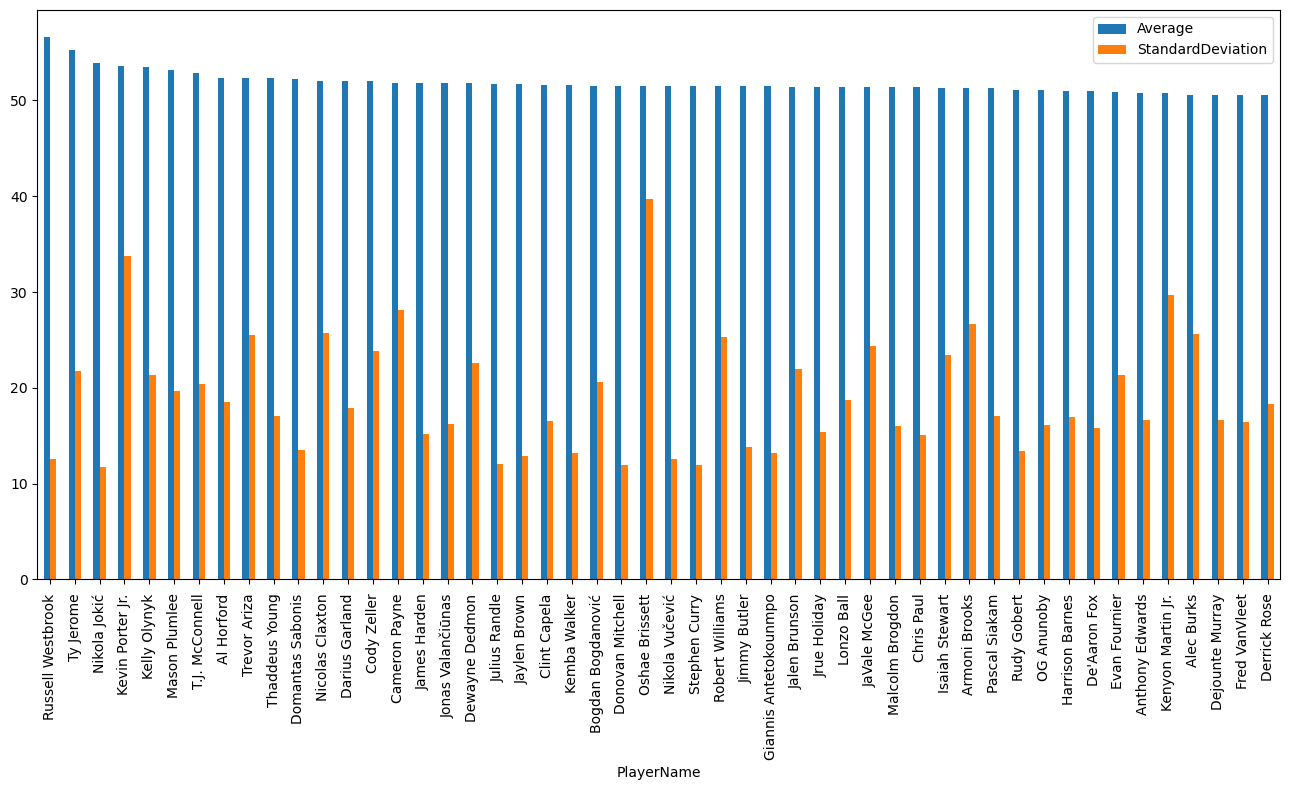

<Figure size 1200x800 with 0 Axes>

In [174]:
first_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

For this study, I like large averages and low standard deviations.  Russell Westbrook, Nikola Jokic, Julius Randle, Donovan Mitchell, and Stephen Curry have the most desireable plots.

In [49]:
second_50=MergeRatios[50:100]

In [50]:
del second_50['PointCostRatio_x']
del second_50['PointCostRatio_y']

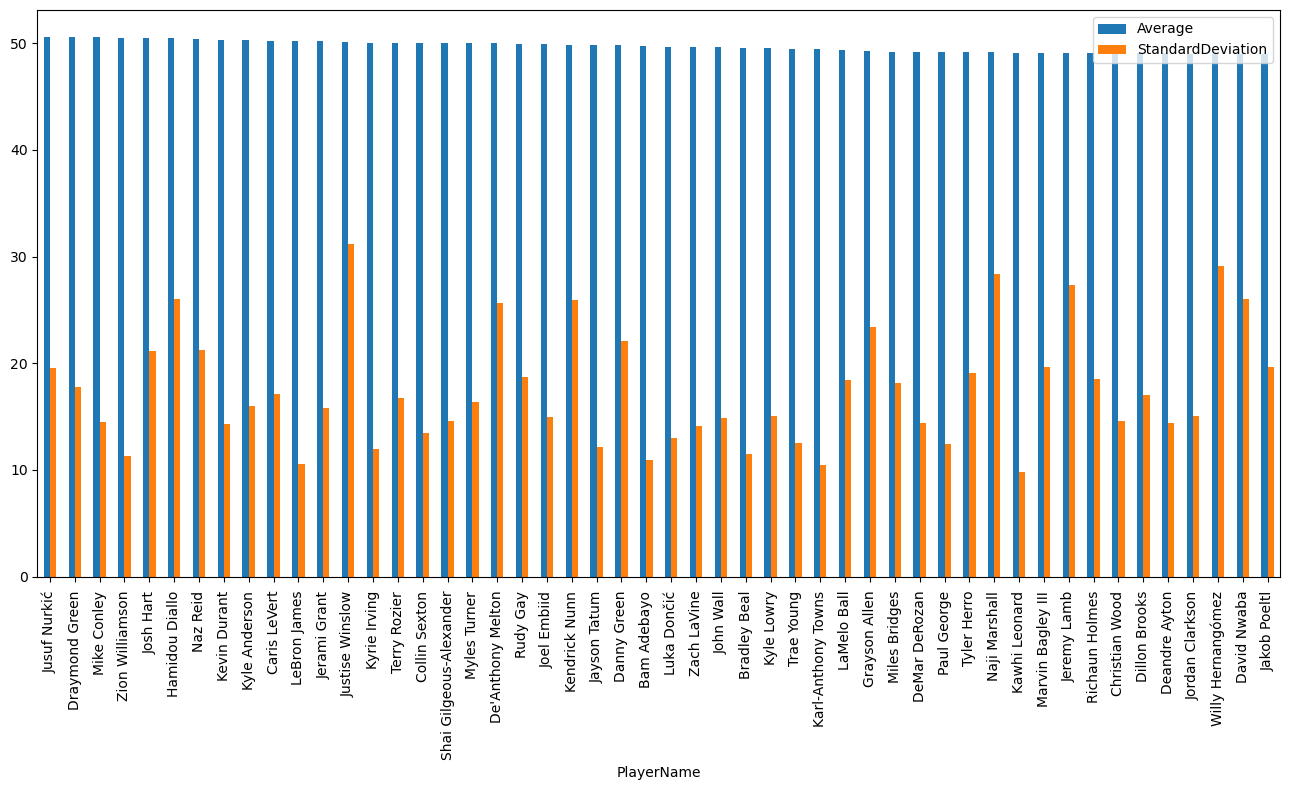

<Figure size 1200x800 with 0 Axes>

In [51]:
second_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [52]:
third_50=MergeRatios[100:150]

In [53]:
del third_50['PointCostRatio_x']
del third_50['PointCostRatio_y']

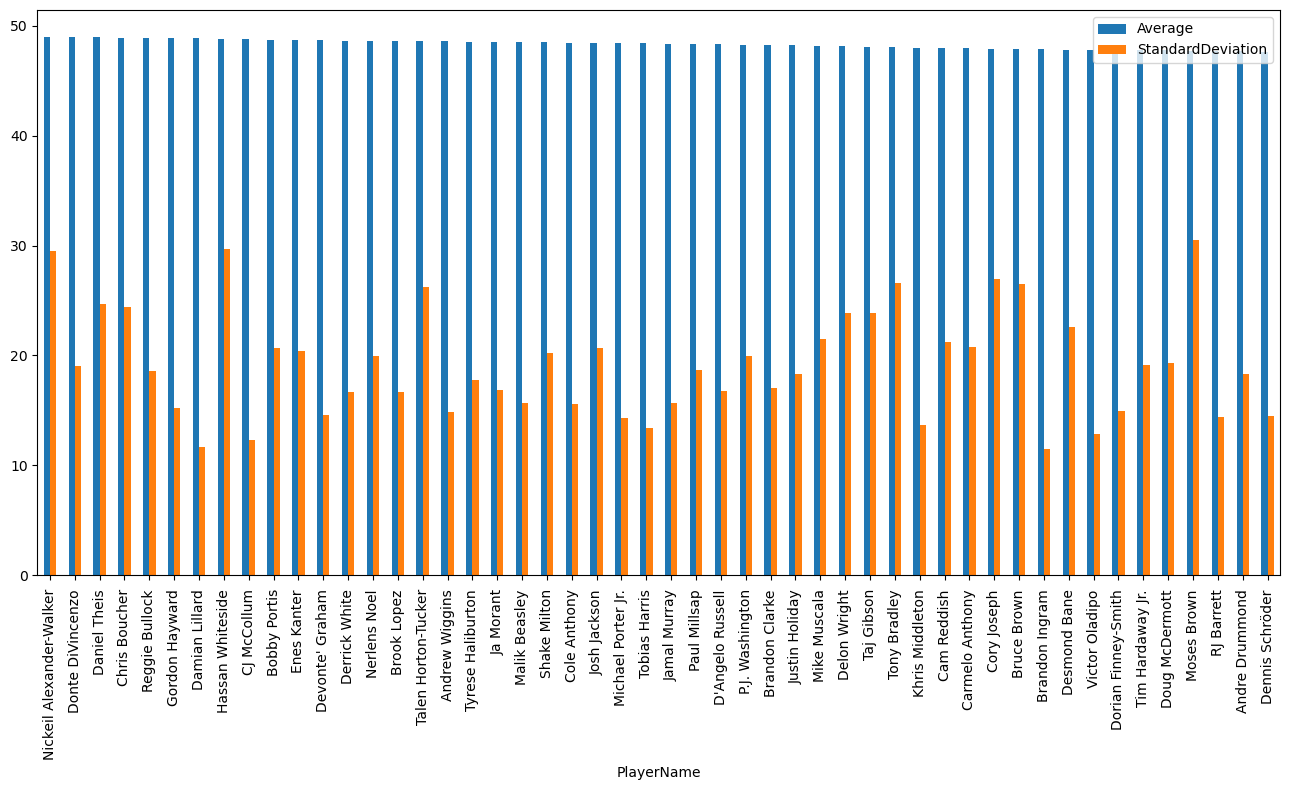

<Figure size 1200x800 with 0 Axes>

In [54]:
third_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [55]:
fourth_50=MergeRatios[150:200]

In [56]:
del fourth_50['PointCostRatio_x']
del fourth_50['PointCostRatio_y']

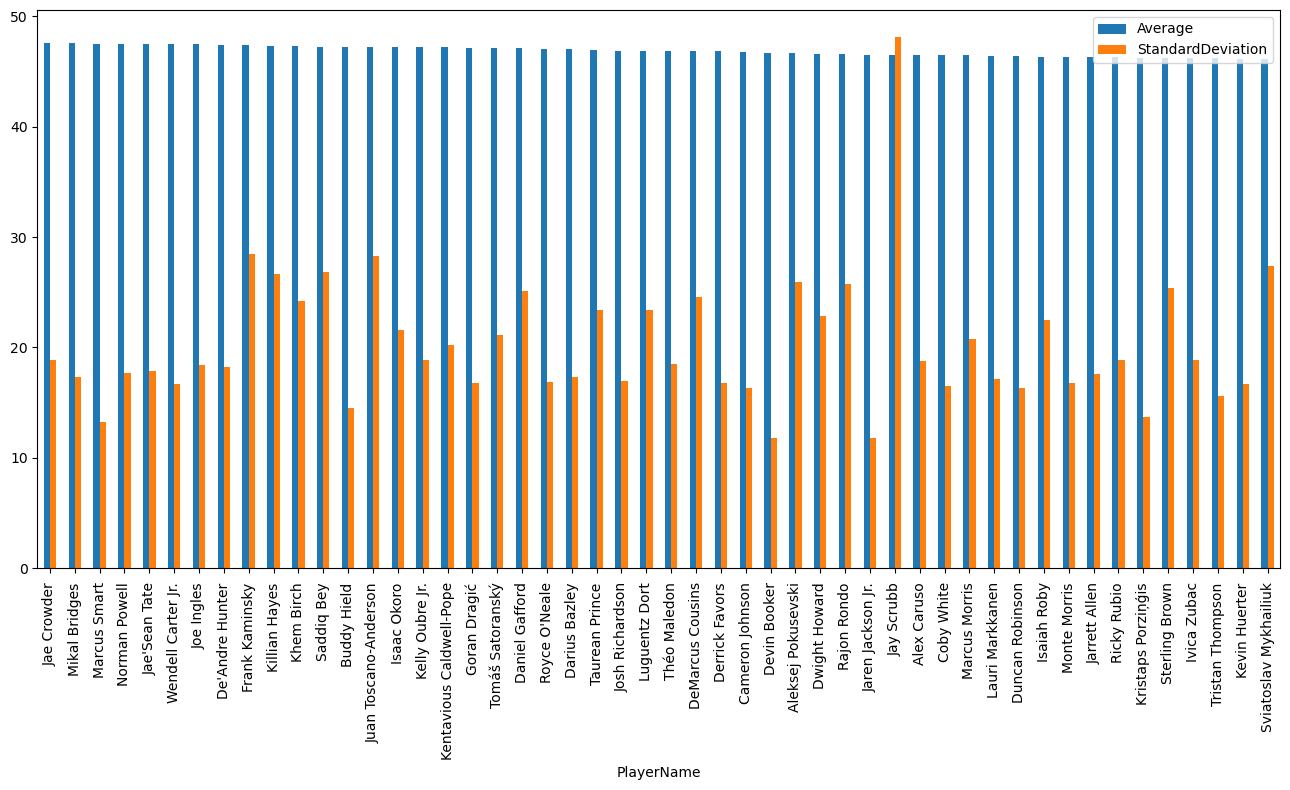

<Figure size 1200x800 with 0 Axes>

In [57]:
fourth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [58]:
fifth_50=MergeRatios[200:250]
del fifth_50['PointCostRatio_x']
del fifth_50['PointCostRatio_y']

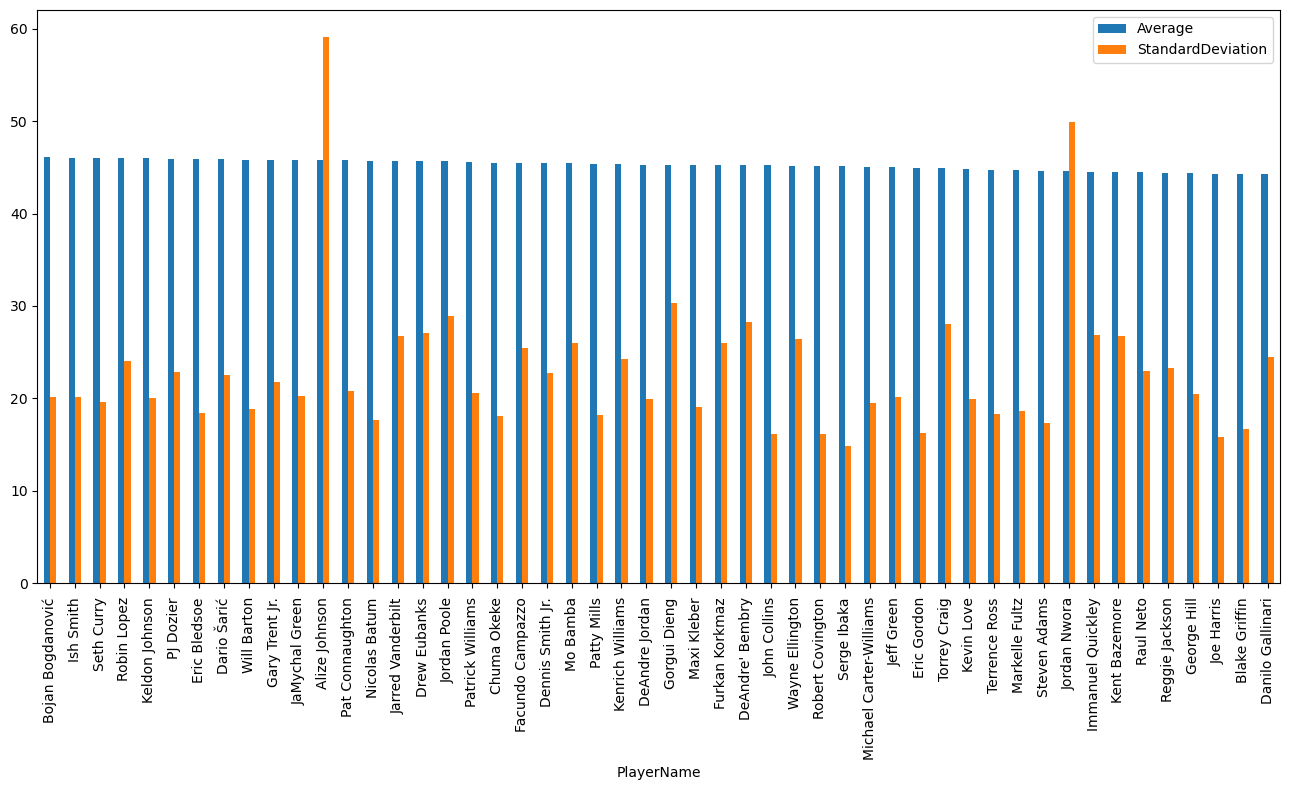

<Figure size 1200x800 with 0 Axes>

In [59]:
fifth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [60]:
sixth_50=MergeRatios[250:300]
del sixth_50['PointCostRatio_x']
del sixth_50['PointCostRatio_y']

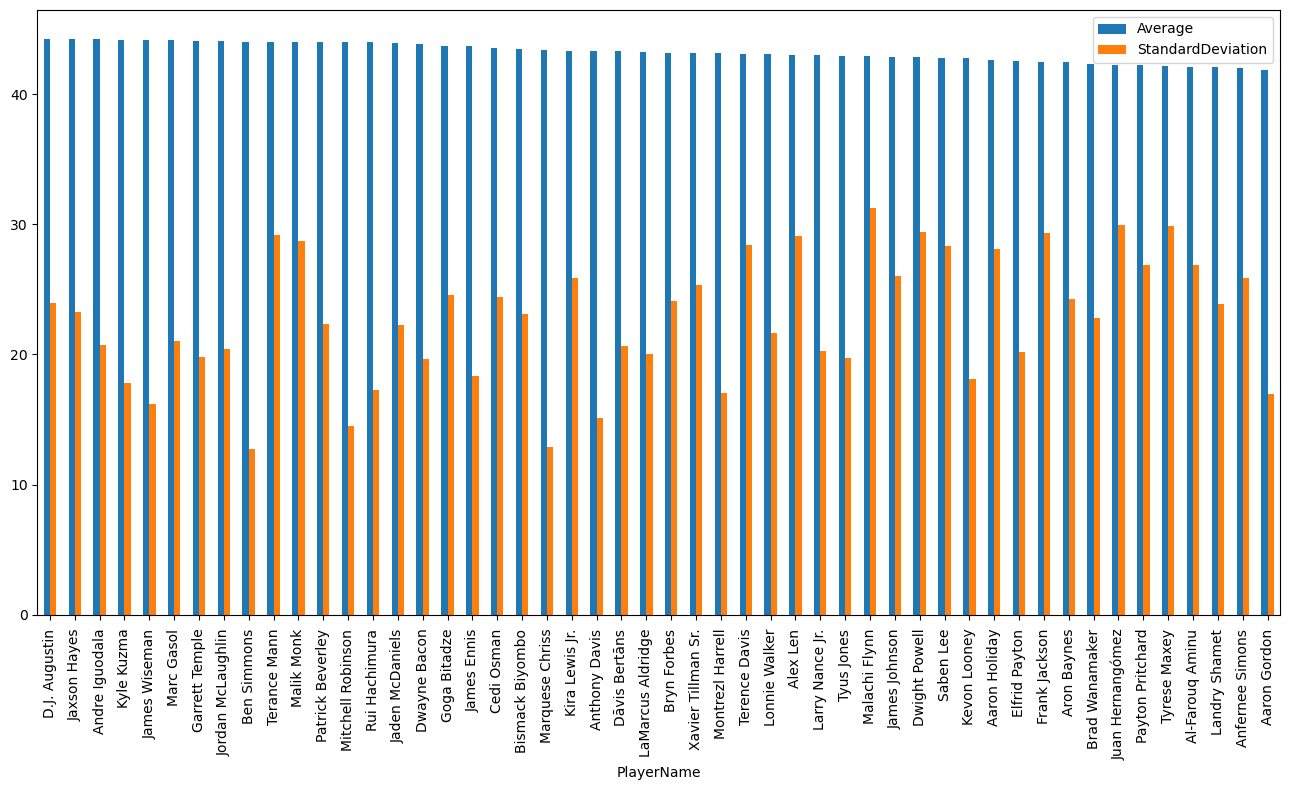

<Figure size 1200x800 with 0 Axes>

In [61]:
sixth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [62]:
seventh_50=MergeRatios[300:350]
del seventh_50['PointCostRatio_x']
del seventh_50['PointCostRatio_y']

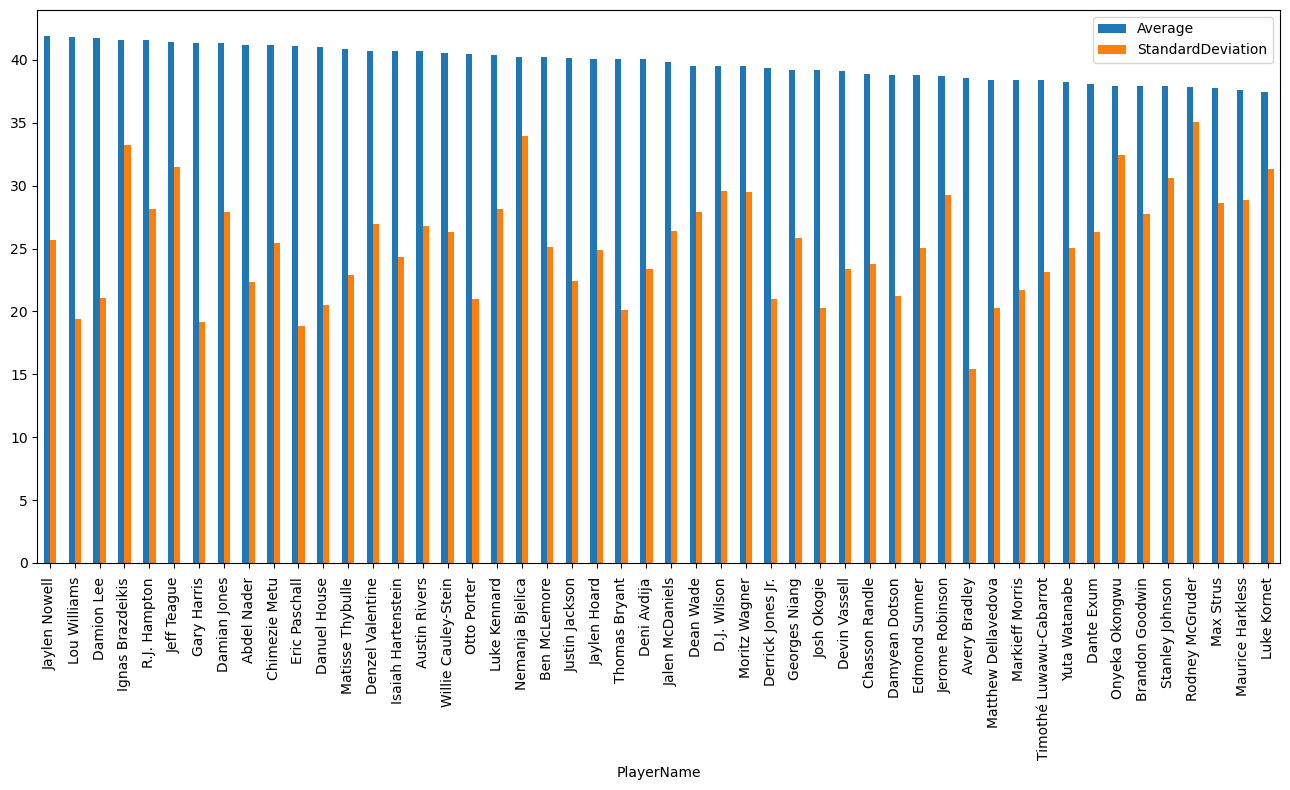

<Figure size 1200x800 with 0 Axes>

In [63]:
seventh_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [64]:
eighth_50=MergeRatios[350:400]
del eighth_50['PointCostRatio_x']
del eighth_50['PointCostRatio_y']

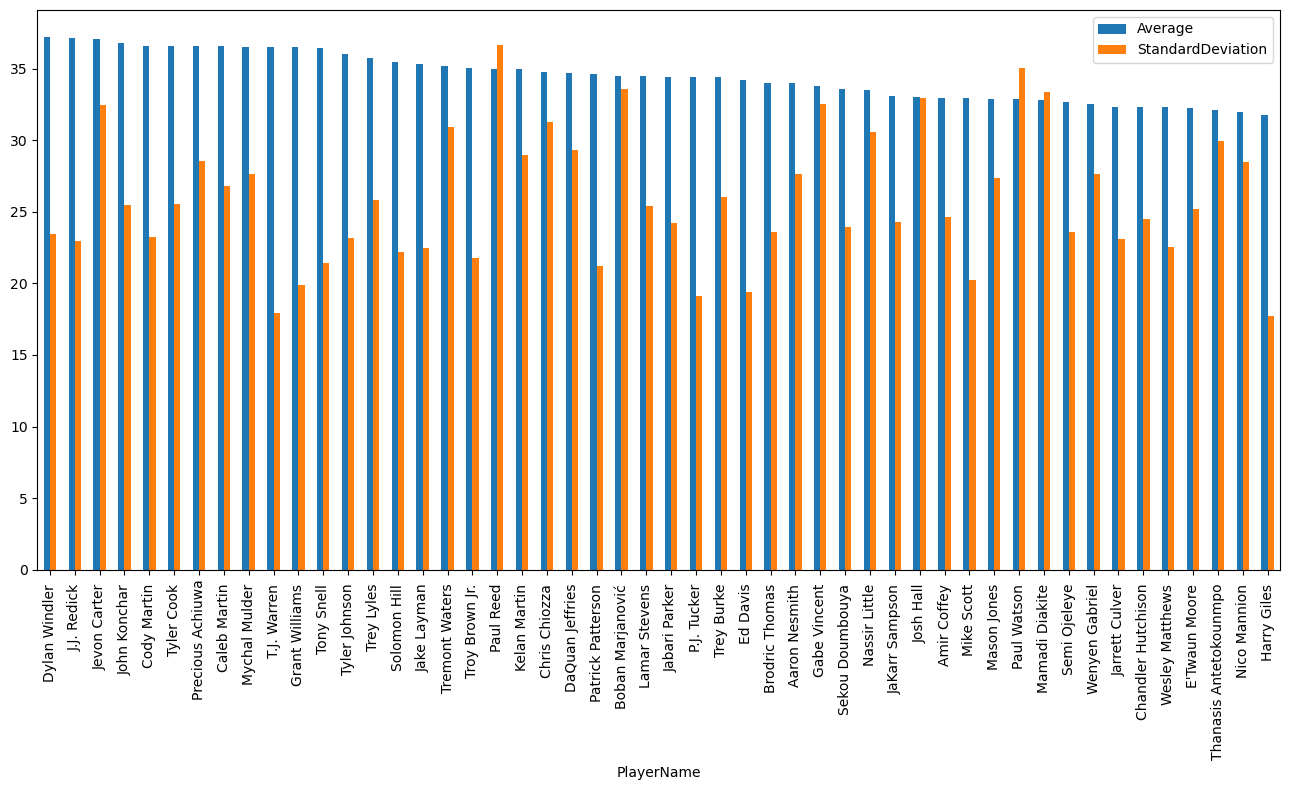

<Figure size 1200x800 with 0 Axes>

In [65]:
eighth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [66]:
ninth_50=MergeRatios[400:450]
del ninth_50['PointCostRatio_x']
del ninth_50['PointCostRatio_y']

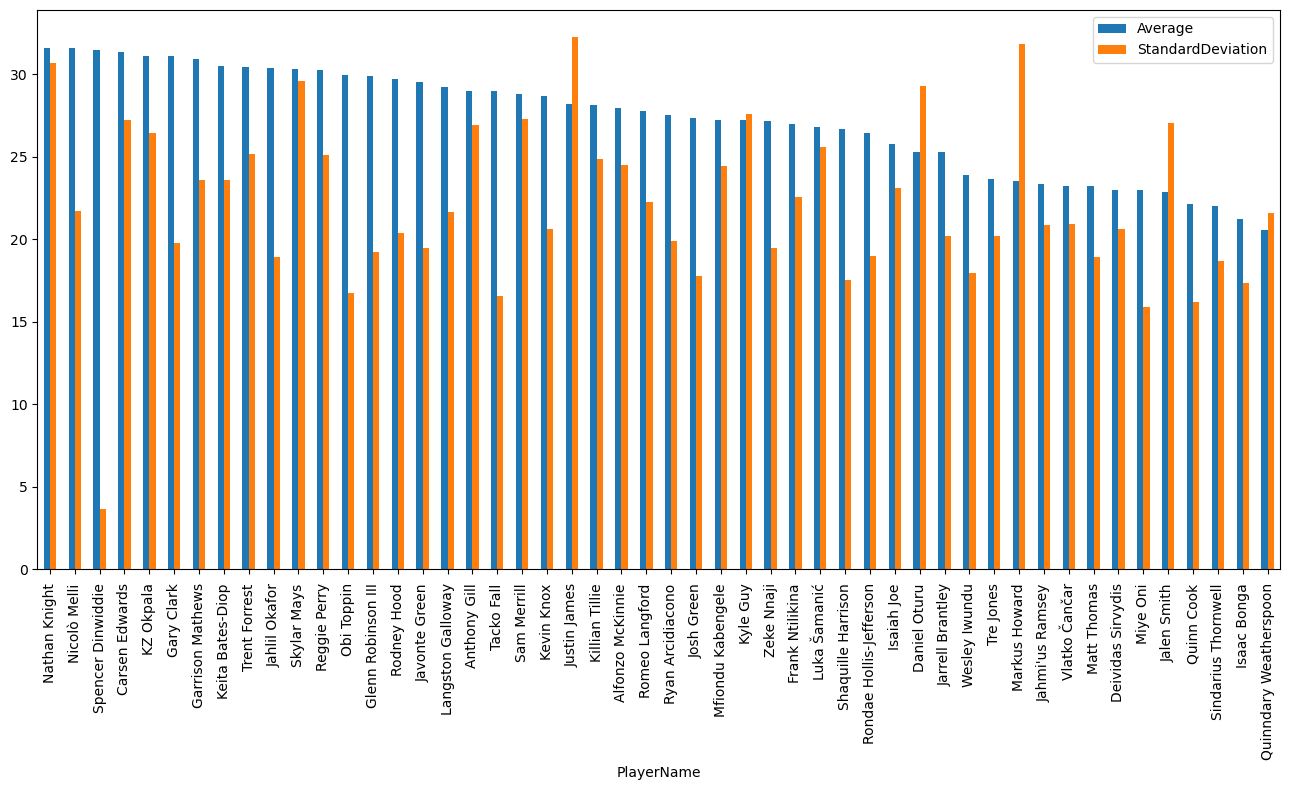

<Figure size 1200x800 with 0 Axes>

In [67]:
ninth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [68]:
tenth_50=MergeRatios[450:]
del tenth_50['PointCostRatio_x']
del tenth_50['PointCostRatio_y']

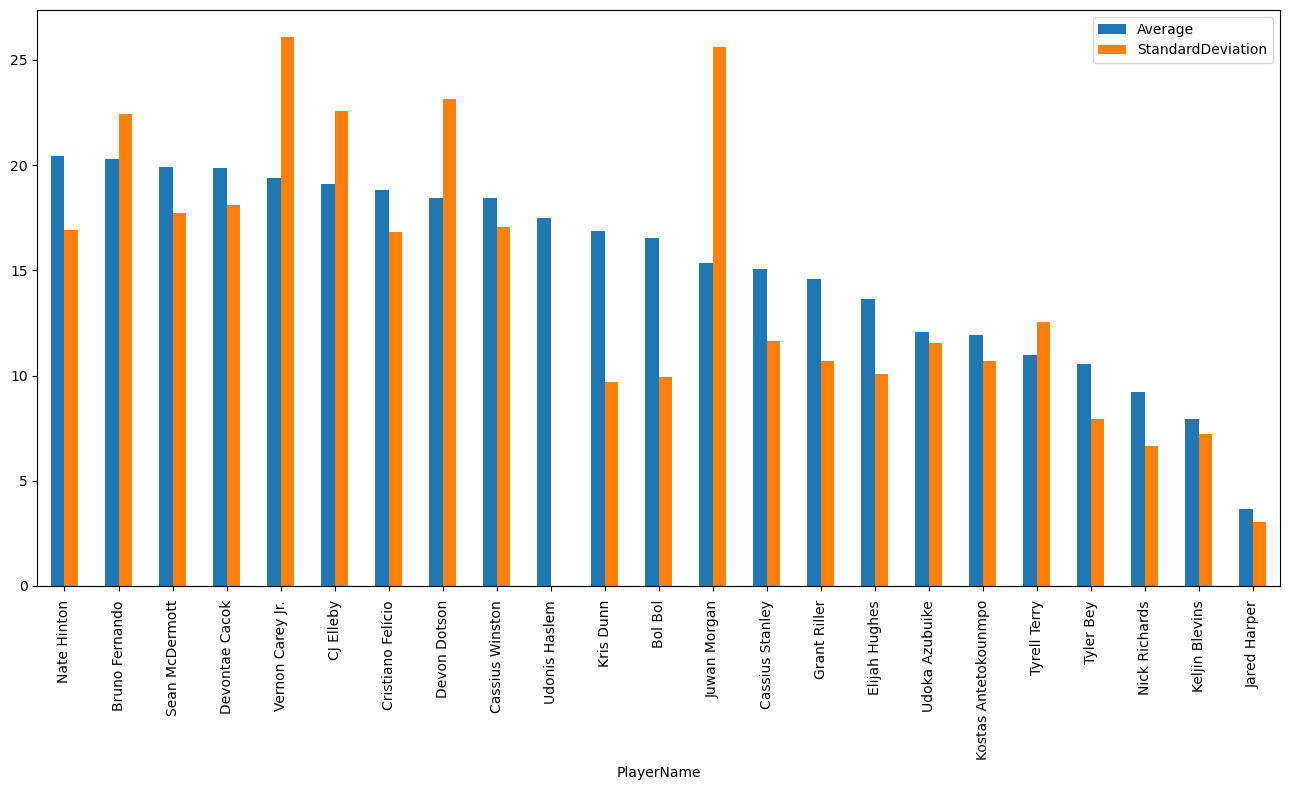

<Figure size 1200x800 with 0 Axes>

In [69]:
tenth_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

# Ratios on Ratios

In the analysis above, we are exploring average PointCostRatio as well as standard deviation PointCostRatio.  It may be beneficial to look at the ratio of the average over the standard deviation.  To do this, I will add a new column that is defined as Average_STD_Ratio which represents Average/Standard Deviation.  For this ratio, larger numbers will be desireable.

In [70]:
MergeRatios['Average_STD_Ratio']=MergeRatios['Average']/MergeRatios['StandardDeviation']
del MergeRatios['PointCostRatio_x']
del MergeRatios['PointCostRatio_y']

In [71]:
MergeRatios

,Average,StandardDeviation,Average_STD_Ratio
PlayerName,,,
Russell Westbrook,56.608037,12.606392,4.490423
Ty Jerome,55.252937,21.725725,2.543203
Nikola Jokić,53.883490,11.789333,4.570529
Kevin Porter Jr.,53.553873,33.742134,1.587151
Kelly Olynyk,53.444172,21.305469,2.508472
...,...,...,...
Tyrell Terry,10.959433,12.558782,0.872651
Tyler Bey,10.547327,7.921265,1.331521
Nick Richards,9.237231,6.649471,1.389168


In [72]:
MergeRatios.sort_values("Average_STD_Ratio", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio
PlayerName,,,
Spencer Dinwiddie,31.452020,3.625365,8.675546
Kawhi Leonard,49.105433,9.788836,5.016473
LeBron James,50.192744,10.548012,4.758503
Karl-Anthony Towns,49.416888,10.421488,4.741826
Nikola Jokić,53.883490,11.789333,4.570529
...,...,...,...
Alize Johnson,45.767520,59.073153,0.774760
Vernon Carey Jr.,19.380338,26.066825,0.743487
Markus Howard,23.507897,31.859708,0.737857


Spencer Dinwiddle has a promising average and he is really consistent.  He would be a dependable peice within a model- you could have high confidence in him scoring around 31.5 PointCostRatio points in any given game.

Well, it turns out that he only played in 3 games last year so we need to refine this analysis to also look at the number of games played.

In [73]:
Number_games=MergedDF.groupby(['PlayerName'])['PlayerName'].count()
Number_games

PlayerName
Aaron Gordon           49
Aaron Holiday          65
Aaron Nesmith          42
Abdel Nader            23
Al Horford             27
                       ..
Xavier Tillman Sr.     57
Yuta Watanabe          50
Zach LaVine            58
Zeke Nnaji             40
Zion Williamson        60
Name: PlayerName, Length: 473, dtype: int64

In [74]:
Number_games = Number_games.to_frame()

In [75]:
Number_games

,PlayerName
PlayerName,
Aaron Gordon,49
Aaron Holiday,65
Aaron Nesmith,42
Abdel Nader,23
Al Horford,27
...,...
Xavier Tillman Sr.,57
Yuta Watanabe,50
Zach LaVine,58


In [76]:
MergeRatios

,Average,StandardDeviation,Average_STD_Ratio
PlayerName,,,
Russell Westbrook,56.608037,12.606392,4.490423
Ty Jerome,55.252937,21.725725,2.543203
Nikola Jokić,53.883490,11.789333,4.570529
Kevin Porter Jr.,53.553873,33.742134,1.587151
Kelly Olynyk,53.444172,21.305469,2.508472
...,...,...,...
Tyrell Terry,10.959433,12.558782,0.872651
Tyler Bey,10.547327,7.921265,1.331521
Nick Richards,9.237231,6.649471,1.389168


I will merge this game total count to our PointCostRatio analysis Dataframe.

In [77]:
Merge_game_count = MergeRatios.join(Number_games)


In [78]:
Merge_game_count

,Average,StandardDeviation,Average_STD_Ratio,PlayerName
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,4.490423,63
Ty Jerome,55.252937,21.725725,2.543203,32
Nikola Jokić,53.883490,11.789333,4.570529,70
Kevin Porter Jr.,53.553873,33.742134,1.587151,26
Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...
Tyrell Terry,10.959433,12.558782,0.872651,10
Tyler Bey,10.547327,7.921265,1.331521,18
Nick Richards,9.237231,6.649471,1.389168,17


In [79]:
Merge_game_count.sort_values("Average_STD_Ratio", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio,PlayerName
PlayerName,,,,
Spencer Dinwiddie,31.452020,3.625365,8.675546,3
Kawhi Leonard,49.105433,9.788836,5.016473,51
LeBron James,50.192744,10.548012,4.758503,43
Karl-Anthony Towns,49.416888,10.421488,4.741826,50
Nikola Jokić,53.883490,11.789333,4.570529,70
...,...,...,...,...
Alize Johnson,45.767520,59.073153,0.774760,15
Vernon Carey Jr.,19.380338,26.066825,0.743487,18
Markus Howard,23.507897,31.859708,0.737857,35


In [80]:
Merge_game_count['GamesPlayed']=Merge_game_count['PlayerName']
del Merge_game_count['PlayerName']
Merge_game_count

,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,4.490423,63
Ty Jerome,55.252937,21.725725,2.543203,32
Nikola Jokić,53.883490,11.789333,4.570529,70
Kevin Porter Jr.,53.553873,33.742134,1.587151,26
Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...
Tyrell Terry,10.959433,12.558782,0.872651,10
Tyler Bey,10.547327,7.921265,1.331521,18
Nick Richards,9.237231,6.649471,1.389168,17


It seems like it is necessary to remove players who only played in a few games.  But first let's look at a histogram of games played for all players.

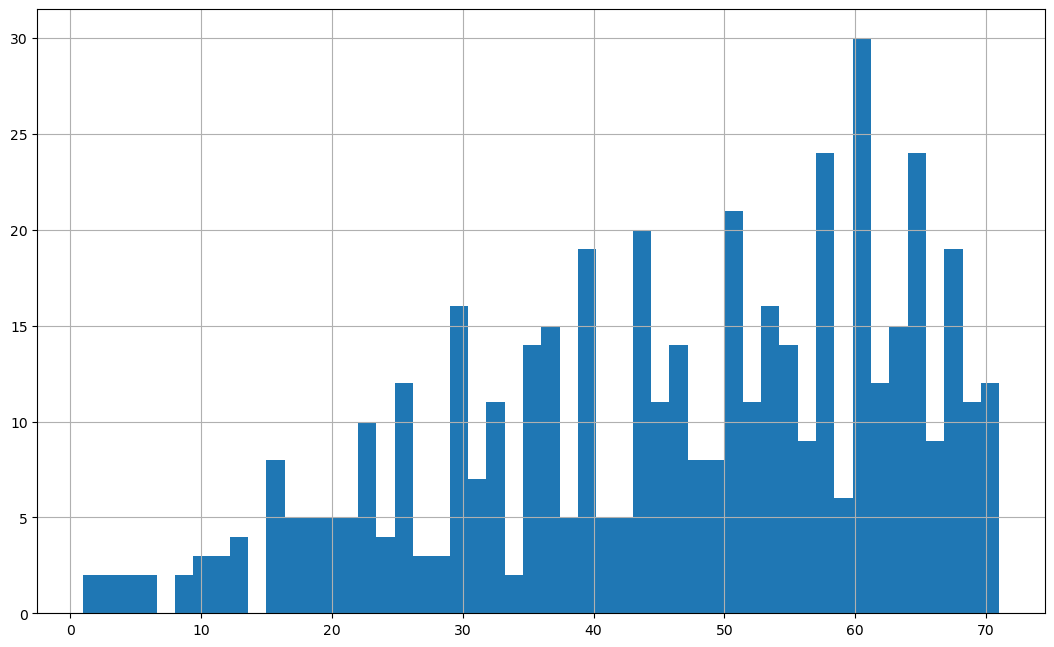

In [81]:
hist = Merge_game_count['GamesPlayed'].hist(bins=50)

In [82]:
Merge_game_count.sort_values("GamesPlayed", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed
PlayerName,,,,
Anthony Edwards,50.787231,16.602544,3.059003,71
Andrew Wiggins,48.613878,14.816738,3.281011,71
Enes Kanter,48.672055,20.386050,2.387518,71
Duncan Robinson,46.387672,16.313829,2.843457,71
Justin Holiday,48.234347,18.264875,2.640825,71
...,...,...,...,...
T.J. Warren,36.522926,17.905582,2.039751,4
Kris Dunn,16.865479,9.702299,1.738297,3
Spencer Dinwiddie,31.452020,3.625365,8.675546,3


I think that we should trim off all players who played less than 15 games.

In [83]:
Merge_games_15=Merge_game_count[Merge_game_count['GamesPlayed'] >= 15] 

In [84]:
Merge_games_15

,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,4.490423,63
Ty Jerome,55.252937,21.725725,2.543203,32
Nikola Jokić,53.883490,11.789333,4.570529,70
Kevin Porter Jr.,53.553873,33.742134,1.587151,26
Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...
Udoka Azubuike,12.083333,11.564176,1.044894,15
Kostas Antetokounmpo,11.944444,10.697478,1.116566,15
Tyler Bey,10.547327,7.921265,1.331521,18


In [85]:
Merge_games_15=Merge_games_15.sort_values("Average_STD_Ratio", ascending=False)

In [86]:
Merge_games_15

,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed
PlayerName,,,,
Kawhi Leonard,49.105433,9.788836,5.016473,51
LeBron James,50.192744,10.548012,4.758503,43
Karl-Anthony Towns,49.416888,10.421488,4.741826,50
Nikola Jokić,53.883490,11.789333,4.570529,70
Bam Adebayo,49.758502,10.968569,4.536463,63
...,...,...,...,...
Jalen Smith,22.854167,27.019551,0.845838,25
Alize Johnson,45.767520,59.073153,0.774760,15
Vernon Carey Jr.,19.380338,26.066825,0.743487,18


In [87]:
Games_ratios=Merge_games_15.filter(['Average_STD_Ratio', 'GamesPlayed'], axis=1)


In [88]:
Games_ratios

,Average_STD_Ratio,GamesPlayed
PlayerName,,
Kawhi Leonard,5.016473,51
LeBron James,4.758503,43
Karl-Anthony Towns,4.741826,50
Nikola Jokić,4.570529,70
Bam Adebayo,4.536463,63
...,...,...
Jalen Smith,0.845838,25
Alize Johnson,0.774760,15
Vernon Carey Jr.,0.743487,18


I have a list of all players and their respective positions.  I think it will be beneficial to look at positions and what correlations can be found between averages, standard deviations, and posiitons.

In [107]:
PlayerPositions=pd.read_csv("PlayerDownload.csv")

In [108]:
PlayerPositions['PlayerName']=PlayerPositions['Name']
PlayerPositions

,Unnamed: 0,Name,Pos.,Height,From,To,Seasons,PlayerName
0,0,Precious Achiuwa,C/PF,2.06/ 6'9'',2020,2021,1,Precious Achiuwa
1,1,Steven Adams,C,2.11/ 6'11'',2013,2021,8,Steven Adams
2,2,Bam Adebayo,C,2.06/ 6'9'',2017,2021,4,Bam Adebayo
3,3,Santi Aldama,C/PF,2.11/ 6'11'',----,----,0,Santi Aldama
4,4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2021,15,LaMarcus Aldridge
...,...,...,...,...,...,...,...,...
516,0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2021,14,Thaddeus Young
517,1,Trae Young,PG,1.85/ 6'1'',2018,2021,3,Trae Young
518,2,Omer Yurtseven,C,2.13/ 7'0'',----,----,0,Omer Yurtseven
519,0,Cody Zeller,C,2.13/ 7'0'',2013,2021,8,Cody Zeller


In [140]:

PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].str.rstrip()
Merge_game_count['PlayerName'] = Merge_game_count['PlayerName'].str.rstrip()


PlayerPositions.set_index('PlayerName')

,level_0,index,Unnamed: 0,Name,Pos.,Height,From,To,Seasons
PlayerName,,,,,,,,,
Precious Achiuwa,0,0,0,Precious Achiuwa,C/PF,2.06/ 6'9'',2020,2021,1
Steven Adams,1,1,1,Steven Adams,C,2.11/ 6'11'',2013,2021,8
Bam Adebayo,2,2,2,Bam Adebayo,C,2.06/ 6'9'',2017,2021,4
Santi Aldama,3,3,3,Santi Aldama,C/PF,2.11/ 6'11'',----,----,0
LaMarcus Aldridge,4,4,4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2021,15
...,...,...,...,...,...,...,...,...,...
Thaddeus Young,516,516,0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2021,14
Trae Young,517,517,1,Trae Young,PG,1.85/ 6'1'',2018,2021,3
Omer Yurtseven,518,518,2,Omer Yurtseven,C,2.13/ 7'0'',----,----,0


In [175]:

PlayerPositions.reset_index(level=0, inplace=True)
Merge_game_count.reset_index(level=1, inplace=True)
PlayerPositions

ValueError: cannot insert level_0, already exists

In [176]:
Positions_added

,index_x,PlayerName,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed,level_0,index_y,Unnamed: 0,Name,Pos.,Height,From,To,Seasons
0,0,Russell Westbrook,56.608037,12.606392,4.490423,63,494,494,14,Russell Westbrook,PG/SG,1.91/ 6'3'',2008,2021,13
1,1,Ty Jerome,55.252937,21.725725,2.543203,32,239,239,7,Ty Jerome,PG/SG,1.96/ 6'5'',2019,2021,2
2,3,Kevin Porter Jr.,53.553873,33.742134,1.587151,26,389,389,13,Kevin Porter Jr.,SG/PG,1.93/ 6'4'',2019,2021,2
3,4,Kelly Olynyk,53.444172,21.305469,2.508472,70,369,369,9,Kelly Olynyk,C/PF,2.11/ 6'11'',2013,2021,8
4,5,Mason Plumlee,53.200547,19.662144,2.705735,55,384,384,8,Mason Plumlee,C,2.11/ 6'11'',2013,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,466,Udoka Azubuike,12.083333,11.564176,1.044894,15,21,21,21,Udoka Azubuike,C,2.13/ 7'0'',2020,2021,1
391,468,Tyrell Terry,10.959433,12.558782,0.872651,10,453,453,4,Tyrell Terry,PG,1.91/ 6'3'',2020,2021,1
392,469,Tyler Bey,10.547327,7.921265,1.331521,18,43,43,21,Tyler Bey,SG/SF,2.01/ 6'7'',2020,2021,1
393,470,Nick Richards,9.237231,6.649471,1.389168,17,407,407,6,Nick Richards,C,2.11/ 6'11'',2020,2021,1


In [177]:
Merge_game_count.reset_index(level=0, inplace=True)

In [150]:
PlayerStats=Merge_game_count

In [152]:
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['LouisWilliams'],'LouWilliams')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BobanMarjanović'],'BobanMarjanovic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NikolaJokić'],'Nikola Jokic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MarvinBagleyIII'],'MarvinBagley')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MoBamba'],'MohamedBamba')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DeAndre\'Bembry'],'DeAndreBembry')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BogdanBogdanović'],'BogdanBogdanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BojanBogdanović'],'BojanBogdanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['VlatkoČančar'],'VlatkoCancar')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DāvisBertāns'],'DavisBertans')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LukaDončić'],'LukaDoncic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['GoranDragić'],'GoranDragic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JuanHernangómez'],'JuanHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WillyHernangómez'],'WillyHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WesleyIwundu'],'WesIwundu')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['Nikola Jokic'],'NikolaJokic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DerrickJonesJr.'],'DerrickJones')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JarenJacksonJr.'],'JarenJackson')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['ThéoMaledon'],'TheoMaledon')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BobanMarjanović'],'BobanMarjanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LarryNanceJr.'],'LarryNance')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JusufNurkić'],'JusufNurkic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KellyOubreJr.'],'KellyOubre')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MichaelPorterJr.'],'MichaelPorter')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KristapsPorziņģis'],'KristapsPorziņgis')
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['KristapsPorzingis'],'KristapsPorziņgis')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LukaŠamanić'],'LukaSamanic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DennisSchröder'],'DennisSchroder')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['IshSmith'],'IshmaelSmith')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['XavierTillmanSr.'],'XavierTillman')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JonasValančiūnas'],'JonasValanciunas')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NikolaVučević'],'NikolaVucevic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['CJMcCollum'],'C.J.McCollum')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['TomášSatoranský'],'TomasSatoransky')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DarioŠarić'],'DarioSaric')
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['GuillermoHernangomez'],'WillyHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['TimothéLuwawu-Cabarrot'],'TimotheLuwawu')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KevinPorterJr.'],'KevinPorter')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WesleyMatthews'],'WesMatthews')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['CristianoFelício'],'CristianoFelicio')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NicolòMelli'],'NicoloMelli')

In [160]:
Positions_added = pd.merge(PlayerStats, PlayerPositions, how="inner", on=["PlayerName"])

In [161]:
Positions_added

,index_x,PlayerName,Average,StandardDeviation,Average_STD_Ratio,GamesPlayed,level_0,index_y,Unnamed: 0,Name,Pos.,Height,From,To,Seasons
0,0,Russell Westbrook,56.608037,12.606392,4.490423,63,494,494,14,Russell Westbrook,PG/SG,1.91/ 6'3'',2008,2021,13
1,1,Ty Jerome,55.252937,21.725725,2.543203,32,239,239,7,Ty Jerome,PG/SG,1.96/ 6'5'',2019,2021,2
2,3,Kevin Porter Jr.,53.553873,33.742134,1.587151,26,389,389,13,Kevin Porter Jr.,SG/PG,1.93/ 6'4'',2019,2021,2
3,4,Kelly Olynyk,53.444172,21.305469,2.508472,70,369,369,9,Kelly Olynyk,C/PF,2.11/ 6'11'',2013,2021,8
4,5,Mason Plumlee,53.200547,19.662144,2.705735,55,384,384,8,Mason Plumlee,C,2.11/ 6'11'',2013,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,466,Udoka Azubuike,12.083333,11.564176,1.044894,15,21,21,21,Udoka Azubuike,C,2.13/ 7'0'',2020,2021,1
391,468,Tyrell Terry,10.959433,12.558782,0.872651,10,453,453,4,Tyrell Terry,PG,1.91/ 6'3'',2020,2021,1
392,469,Tyler Bey,10.547327,7.921265,1.331521,18,43,43,21,Tyler Bey,SG/SF,2.01/ 6'7'',2020,2021,1
393,470,Nick Richards,9.237231,6.649471,1.389168,17,407,407,6,Nick Richards,C,2.11/ 6'11'',2020,2021,1


There are some lines in the table above that need some time consuming cleaning but for the sake of time and considering this is a side exploration, i will remove incomplete rows and analze.

In [163]:
Positions_added=Positions_added[Positions_added.To !='----']

In [165]:
Positions_added['Pos.'].unique()

array(['PG/SG', 'SG/PG', 'C/PF', 'C', 'PG', 'SF/PF', 'PF/C', 'PF',
       'SF/SG', 'SG/SF', 'PF/SF', 'SG', 'SF'], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'PG/SG'),
  Text(1, 0, 'SG/PG'),
  Text(2, 0, 'C/PF'),
  Text(3, 0, 'C'),
  Text(4, 0, 'PG'),
  Text(5, 0, 'SF/PF'),
  Text(6, 0, 'PF/C'),
  Text(7, 0, 'PF'),
  Text(8, 0, 'SF/SG'),
  Text(9, 0, 'SG/SF'),
  Text(10, 0, 'PF/SF'),
  Text(11, 0, 'SG'),
  Text(12, 0, 'SF')])

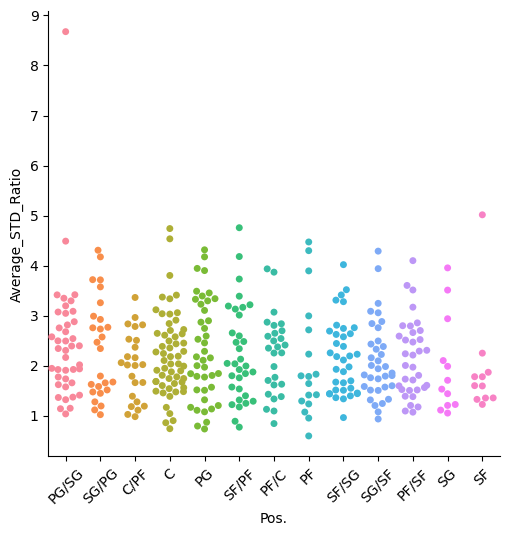

In [179]:
sns.catplot(x="Pos.", y="Average_STD_Ratio", kind="swarm", data=Positions_added)
plt.xticks(rotation=45)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points c

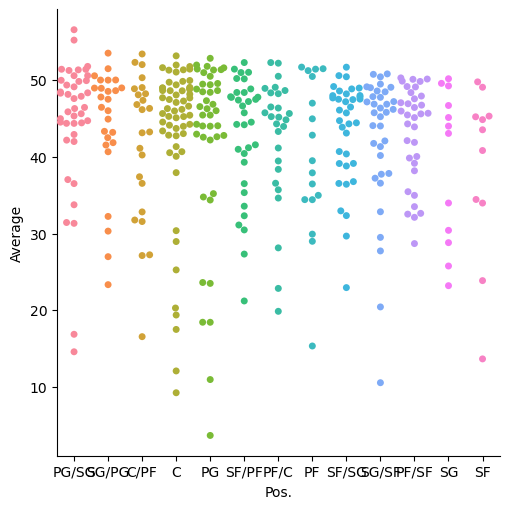

In [168]:
sns.catplot(x="Pos.", y="Average", kind="swarm", data=Positions_added)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points c

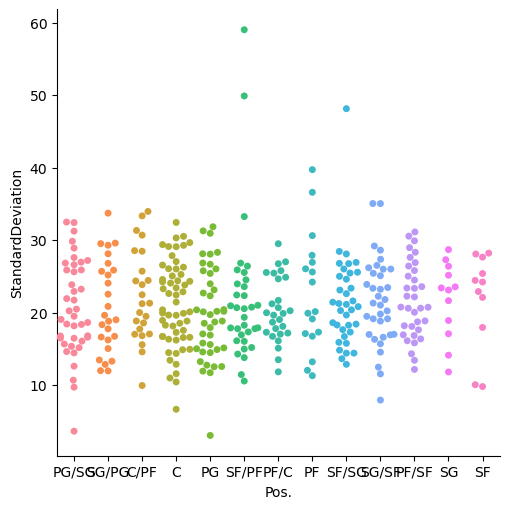

In [169]:
sns.catplot(x="Pos.", y="StandardDeviation", kind="swarm", data=Positions_added)

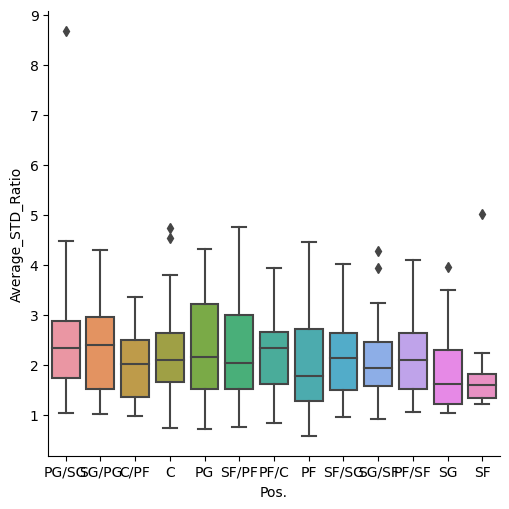

In [170]:
sns.catplot(x="Pos.", y="Average_STD_Ratio", kind="box", data=Positions_added)

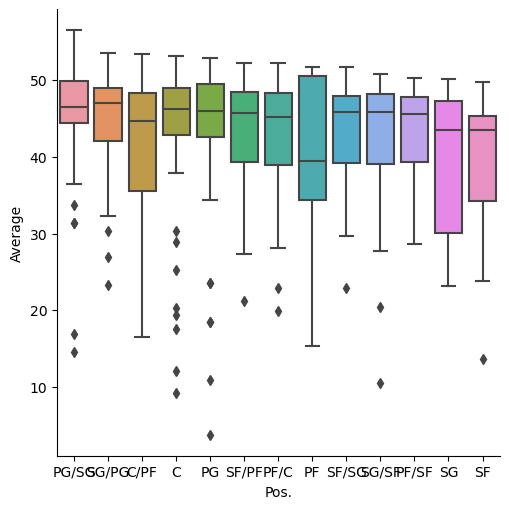

In [171]:
sns.catplot(x="Pos.", y="Average", kind="box", data=Positions_added)

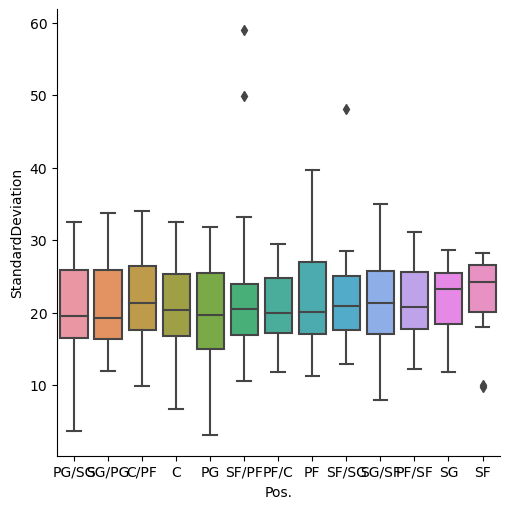

In [172]:
sns.catplot(x="Pos.", y="StandardDeviation", kind="box", data=Positions_added)

In [164]:
Positions_added.to_csv("positions_added.csv")